In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
ad_clicks_csv = pd.read_csv('Social_Network_Ads.csv')
ad_clicks = ad_clicks_csv.drop('User ID', 1)
ad_clicks

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [5]:
from sklearn.preprocessing import OneHotEncoder
One_enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(One_enc.fit_transform(ad_clicks[['Gender']]).toarray())
Enc_ds= ad_clicks.join(enc_df)
Enc_ds
#0=F, 1=M, 0.0=False, 1.0=True

,Gender,Age,EstimatedSalary,Purchased,0,1
0,Male,19,19000,0,0.0,1.0
1,Male,35,20000,0,0.0,1.0
2,Female,26,43000,0,1.0,0.0
3,Female,27,57000,0,1.0,0.0
4,Male,19,76000,0,0.0,1.0
...,...,...,...,...,...,...
395,Female,46,41000,1,1.0,0.0
396,Male,51,23000,1,0.0,1.0
397,Female,50,20000,1,1.0,0.0
398,Male,36,33000,0,0.0,1.0


In [6]:
ad_clicks_enc = Enc_ds.drop('Gender', 1)
ad_clicks_enc

,Age,EstimatedSalary,Purchased,0,1
0,19,19000,0,0.0,1.0
1,35,20000,0,0.0,1.0
2,26,43000,0,1.0,0.0
3,27,57000,0,1.0,0.0
4,19,76000,0,0.0,1.0
...,...,...,...,...,...
395,46,41000,1,1.0,0.0
396,51,23000,1,0.0,1.0
397,50,20000,1,1.0,0.0
398,36,33000,0,0.0,1.0


Scatter Matrix - determining pairwise bivariate distributions

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>],
       [<AxesSubplot:xlabel='Age', ylabel='Purchased'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Purchased'>]],
      dtype=object)

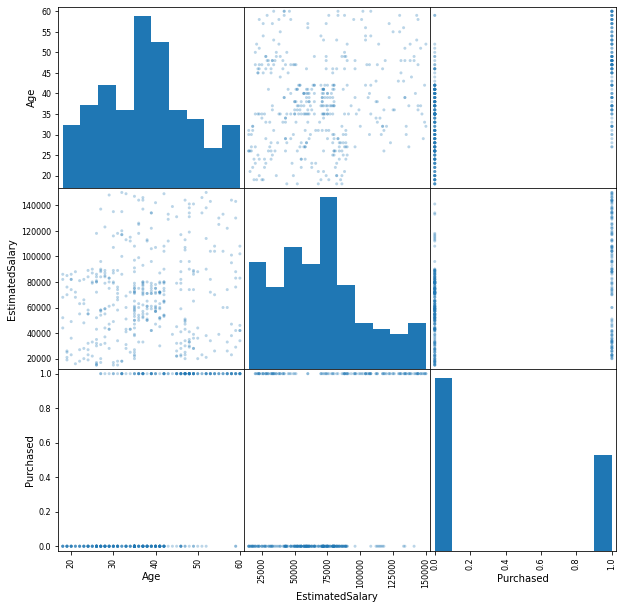

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(ad_clicks[['Age', 'Gender','EstimatedSalary', 'Purchased']],
    alpha=0.3, figsize=(10,10))
